Let's practice communicating findings using visualizations with the census income data.

In [1]:
import pandas as pd

% matplotlib inline

In [2]:
df = pd.read_csv("census_income_data.csv")
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [3]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
# Creating two dataframes to separate people who make above and below $50,000

In [5]:
df_above = df[ df["income"]==" >50K" ]
df_above.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [6]:
df_below = df[ df["income"]==" <=50K" ]
df_below.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Using bar graphs to compare the education levels reached in both groups

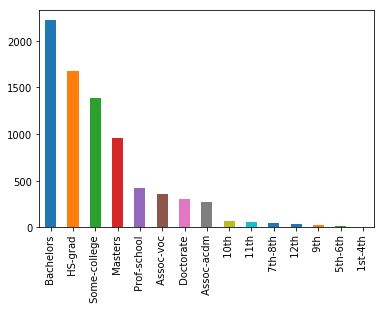

In [8]:
df_above["education"].value_counts().plot(kind="bar");

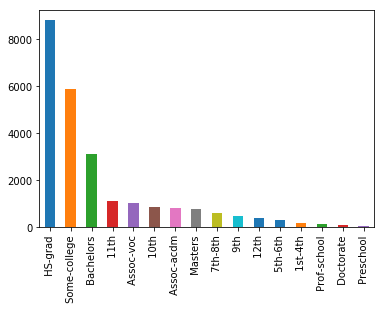

In [9]:
df_below["education"].value_counts().plot(kind="bar");

Since the value_counts() returns the counts in order by size, we don’t have consistent x-axis labels for these graphs.  
It’s ideal to have the labels in the same order if we want to make a clear comparison. So let’s order both results from value_counts() with the same index.

In [10]:
indexes = df_above["education"].value_counts().index
indexes

Index([' Bachelors', ' HS-grad', ' Some-college', ' Masters', ' Prof-school',
       ' Assoc-voc', ' Doctorate', ' Assoc-acdm', ' 10th', ' 11th', ' 7th-8th',
       ' 12th', ' 9th', ' 5th-6th', ' 1st-4th'],
      dtype='object')

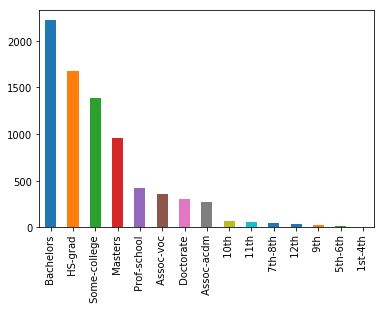

In [11]:
df_above["education"].value_counts()[indexes].plot(kind="bar");

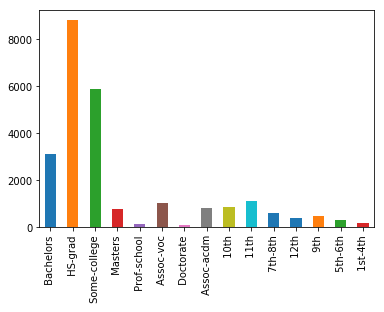

In [12]:
df_below["education"].value_counts()[indexes].plot(kind="bar");

In [13]:
# Plot pie charts to compare what work classes dominate in each group

In [14]:
indexes = df_above["workclass"].value_counts().index
indexes

Index([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Local-gov',
       ' Federal-gov', ' State-gov'],
      dtype='object')

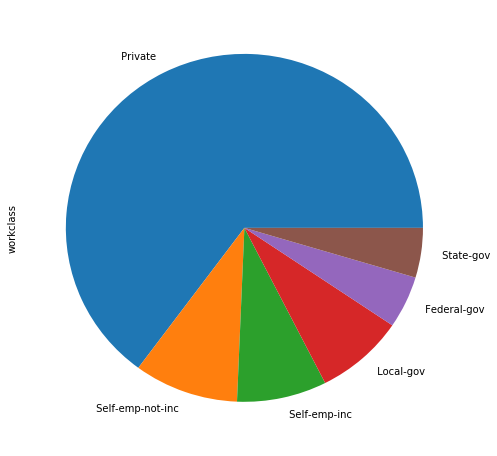

In [15]:
df_above["workclass"].value_counts()[indexes].plot(kind="pie", figsize=(8,8));

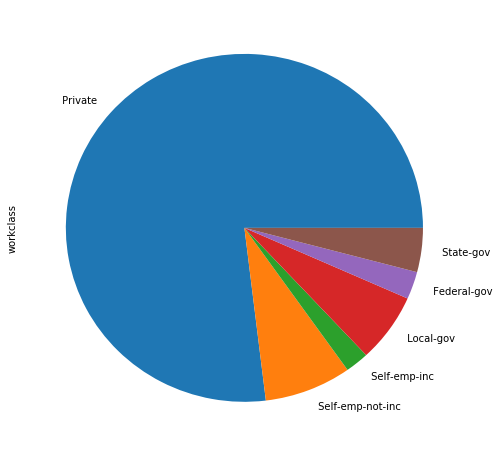

In [16]:
df_below["workclass"].value_counts()[indexes].plot(kind="pie", figsize=(8,8));

In [17]:
# Using histograms to plot the distribution of ages for each group

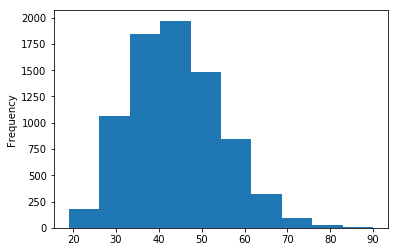

In [18]:
df_above["age"].plot(kind="hist");

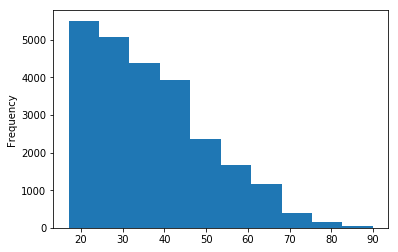

In [19]:
df_below["age"].plot(kind="hist");

Interesting, the people who make more than 50,000 seem to be older.

In [20]:
df_above["age"].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [21]:
df_below["age"].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

Looking at the summary statistics, we can see that the mean age for those making less is about 37, and 44 for those making more.

This shows us that people making more are generally older, but these visualizations (all those seen in this exercise) give us a much better idea of how those ages are distributed in these examples